In [3]:
library(tidyverse)
library(readr)
library(ISLR2)
library(caret)
library(pROC)
library(gbm)

In [4]:
#Data Preparation

#Add data
#Remove the 1st and last colums because they are irrelevant to the model building process
#Change the labels of Diagnosis (predicted Y) as Yes (1) and No (0)

### Result shows that there are 1389 No and 760 Yes -> Data is imbalanced

In [5]:
data <- read_csv("/kaggle/input/alzheimers-disease-dataset/alzheimers_disease_data.csv", show_col_types = FALSE) 
data <- as.data.frame(data) 
data <- data[ , -c(1, ncol(data))]
data$Diagnosis <- factor(data$Diagnosis, levels = c(0, 1), labels = c("No", "Yes"))
summary(data$Diagnosis)
head(data)

No  Yes 
1389  760

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,⋯,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,73,0,0,2,22.92775,0,13.297218,6.3271125,1.3472143,9.025679,⋯,6.518877,0,0,1.72588346,0,0,0,1,0,No
2,89,0,0,0,26.82768,0,4.542524,7.6198845,0.5187671,7.151293,⋯,7.118696,0,0,2.59242413,0,0,0,0,1,No
3,73,0,3,1,17.79588,0,19.555085,7.8449878,1.8263347,9.673574,⋯,5.895077,0,0,7.11954774,0,1,0,1,0,No
4,74,1,0,1,33.80082,1,12.209266,8.4280014,7.4356041,8.392554,⋯,8.965106,0,1,6.48122586,0,0,0,0,0,No
5,89,0,0,0,20.71697,0,18.454356,6.3104607,0.7954975,5.597238,⋯,6.045039,0,0,0.01469122,0,0,1,1,0,No
6,86,1,1,1,30.62689,0,4.140144,0.2110616,1.5849220,7.261953,⋯,5.510144,0,0,9.01568628,1,0,0,0,0,No


In [ ]:
#Standardize data to make it more scaled
#But if a column is classification data, keep as it is

In [6]:
columns_keep <- c("Gender","Ethnicity","EducationLevel", "Smoking",
                  "FamilyHistoryAlzheimers", "CardiovascularDisease",
                  "Diabetes", "Depression", "HeadInjury","Hypertension",
                  "MemoryComplaints", "BehaviorProblem",
                  "Confusion", "Disorientation","PersonalityChange",
                  "DifficultyCompletingTasks","Forgetfulness","Diagnosis")
data[,-which(names(data) %in% columns_keep)] <- 
        scale(data[,-which(names(data) %in% columns_keep)])
head(data)

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,⋯,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,-0.212319,0,0,2,-0.6550728,0,0.5657914,0.4924103,-1.2533017,1.11965745,⋯,0.4973901,0,-0.4311563,-1.1041775,0,0,-0.4212501,1,0,No
2,1.567392,0,0,0,-0.1147243,0,-0.9546724,0.9448729,-1.5380839,0.05682309,⋯,0.7047429,0,-0.4311563,-0.8104125,0,0,-0.4212501,0,1,No
3,-0.212319,0,3,1,-1.3661100,0,1.6526209,1.0236577,-1.0886021,1.48703408,⋯,0.2817472,0,-0.4311563,0.7243229,0,1,-0.4212501,1,0,No
4,-0.101087,1,0,1,0.8514268,1,0.3768422,1.2277090,0.8396081,0.76065615,⋯,1.3430335,0,2.3182650,0.5079260,0,0,-0.4212501,0,0,No
5,1.567392,0,0,0,-0.9613831,0,1.4614528,0.4865823,-1.4429567,-0.82437383,⋯,0.3335878,0,-0.4311563,-1.6842869,0,0,2.3727821,1,0,No
6,1.233697,1,1,1,0.4116680,0,-1.0245554,-1.6481713,-1.1715887,0.11957058,⋯,0.1486786,0,-0.4311563,1.3671308,1,0,-0.4212501,0,0,No


In [ ]:
#Model building 

#Split data into 75% training and 25% testing

In [8]:
set.seed(1)
rowTrain <- createDataPartition(y = data$Diagnosis,
                                p = 0.75,
                                list = FALSE)

In [9]:
#Use Sensitivity because data is imbalanced (shown above)
#Create a train function using 5-fold cross validation

In [10]:
set.seed(1)
ctrl <- trainControl(method = "cv",
                     number = 5,
                     summaryFunction = twoClassSummary,
                     classProbs = TRUE)

In [11]:
#Logistic Reg

#Create a grid for tuning parameter lambda
#Train the data and show the best lambda (alpha = 0)

In [12]:
glmnGrid <- expand.grid(.alpha = 0,
                        .lambda = exp(seq(-8, 1, length = 10)))
set.seed(1)
model.glmn <- train(x = data[rowTrain, 1:32],
                    y = data$Diagnosis[rowTrain],
                    method = "glmnet",
                    tuneGrid = glmnGrid,
                    metric = "ROC",
                    trControl = ctrl)
model.glmn$bestTune

,alpha,lambda
,<dbl>,<dbl>
4,0,0.006737947


            Length Class      Mode     
a0           100   -none-     numeric  
beta        3200   dgCMatrix  S4       
df           100   -none-     numeric  
dim            2   -none-     numeric  
lambda       100   -none-     numeric  
dev.ratio    100   -none-     numeric  
nulldev        1   -none-     numeric  
npasses        1   -none-     numeric  
jerr           1   -none-     numeric  
offset         1   -none-     logical  
classnames     2   -none-     character
call           5   -none-     call     
nobs           1   -none-     numeric  
lambdaOpt      1   -none-     numeric  
xNames        32   -none-     character
problemType    1   -none-     character
tuneValue      2   data.frame list     
obsLevels      2   -none-     character
param          0   -none-     list     

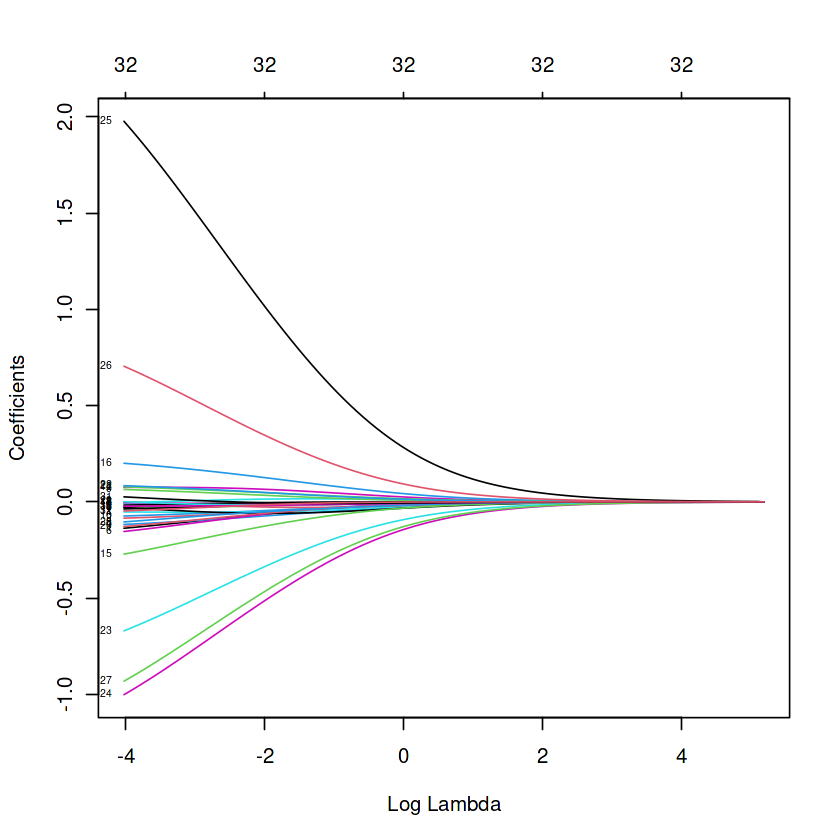

In [13]:
#Summary of Logistic Regression model
summary(model.glmn$finalModel)
plot(model.glmn$finalModel, xvar = "lambda", label = TRUE)

In [ ]:
#KNN

#Create a grid for k
#Tune k and show the best k

In [14]:
kGrid <- expand.grid(k = seq(from = 1, to = 40, by = 1))
set.seed(1)
model.knn <- train(x = data[rowTrain, 1:32],
                   y = data$Diagnosis[rowTrain],
                   method = "knn",
                   trControl = ctrl,
                   metric = "ROC",
                   tuneGrid = kGrid)
model.knn$bestTune

,k
,<dbl>
35,35


            Length Class      Mode     
learn        2     -none-     list     
k            1     -none-     numeric  
theDots      0     -none-     list     
xNames      32     -none-     character
problemType  1     -none-     character
tuneValue    1     data.frame list     
obsLevels    2     -none-     character
param        0     -none-     list     

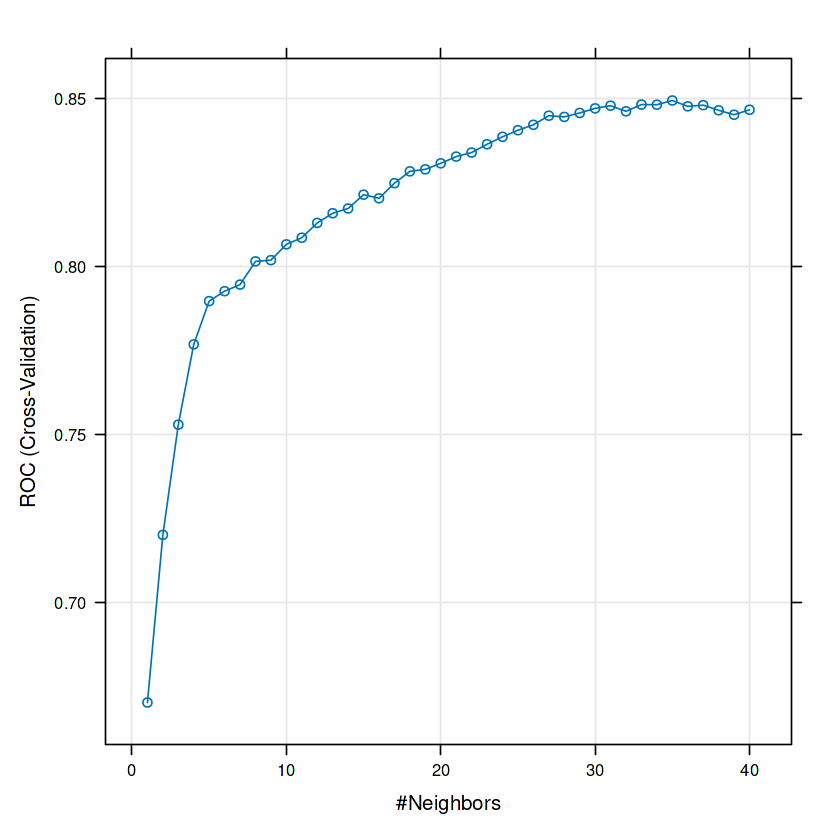

In [15]:
#Summary of KNN model
summary(model.knn$finalModel)
plot(model.knn)

In [ ]:
#Evaluate models on test data (performance comparision)

## Logistic Regression (AUC = 0.889) is performing better than KNN (AUC = 0.817)

## Logistic Regression is better at identifying true positives (patients with Alzheimer’s) 
    # while maintaining a lower false positive rate

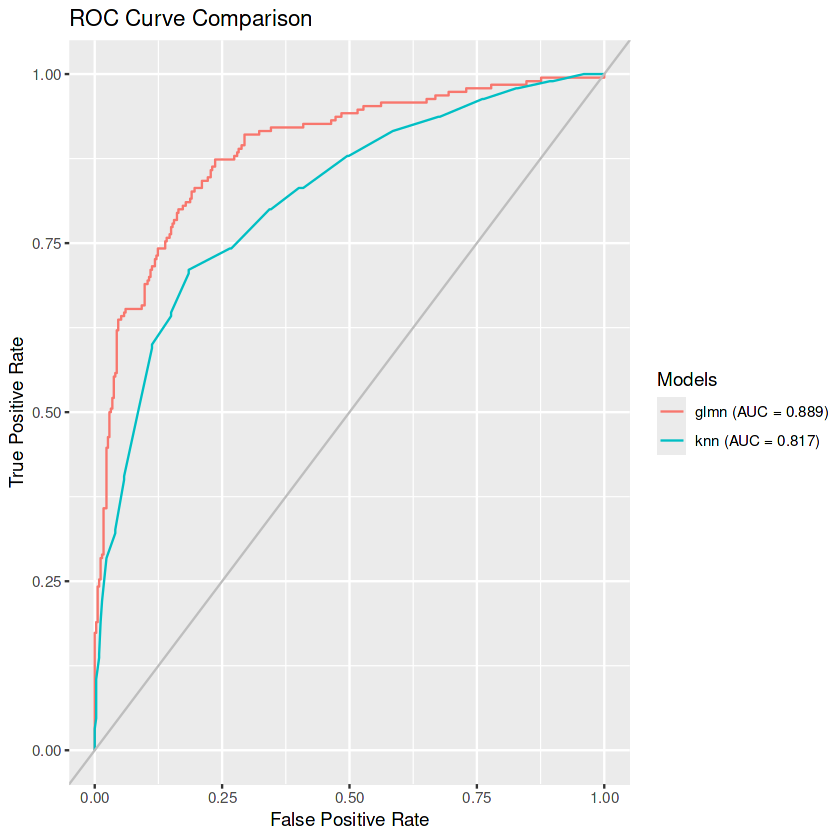

In [16]:
glmn.pred <- predict(model.glmn, newdata = data[-rowTrain,], type = "prob")[,2]
knn.pred <- predict(model.knn, newdata = data[-rowTrain,], type = "prob")[,2]

roc.glmn <- suppressMessages(roc(data$Diagnosis[-rowTrain], glmn.pred, 
                levels = c("No", "Yes"),direction = "auto"))
roc.knn <- suppressMessages(roc(data$Diagnosis[-rowTrain], knn.pred, 
               levels = c("No", "Yes"),direction = "auto"))

auc <- c(roc.glmn$auc[1], roc.knn$auc[1])

modelNames <- c("glmn","knn")

ggroc(list(roc.glmn, roc.knn), legacy.axes = TRUE) +
 scale_color_discrete(labels = paste0(modelNames, " (AUC = ", round(auc, 3), ")"),
                       name = "Models") +
  geom_abline(intercept = 0, slope = 1, color = "grey") +
  labs(title = "ROC Curve Comparison", x = "False Positive Rate", y = "True Positive Rate")

DISCUSSION
   
   The logistic regression model (AUC=0.889), showed strong predictive performance in distinguishing between patients with and without Alzheimer’s disease, making it a suitable choice for this application.
   
   KNN, with an AUC of 0.817, performed reasonably well but was less effective than logistic regression.
   
   Overall, logistic regression proved more effective, likely due to its ability to model linear relationships and manage multicollinearity through regularization.

In [ ]:
#more advanced method
##Gradient Boosting 

In [17]:
#Tune hyperparameter 
gbmGrid <- expand.grid(interaction.depth = c(1, 3, 5),  # Depth of trees
                       n.trees = seq(50, 300, by = 50),  # Number of trees
                       shrinkage = c(0.01, 0.1, 0.3),   # Learning rate
                       n.minobsinnode = c(10))          # Minimum number of observations per node

#Train the model
set.seed(1)
model.gbm <- train(x = data[rowTrain, 1:32],
                   y = data$Diagnosis[rowTrain],
                   method = "gbm",
                   trControl = ctrl,
                   metric = "ROC",
                   tuneGrid = gbmGrid,
                   verbose = FALSE)
#Best tune
model.gbm$bestTune

,n.trees,interaction.depth,shrinkage,n.minobsinnode
,<dbl>,<dbl>,<dbl>,<dbl>
14,100,5,0.01,10


,var,rel.inf
,<chr>,<dbl>
FunctionalAssessment,FunctionalAssessment,26.26429
ADL,ADL,22.50566
MMSE,MMSE,21.53424
MemoryComplaints,MemoryComplaints,16.63718
BehavioralProblems,BehavioralProblems,13.05864
Age,Age,0.00000
Gender,Gender,0.00000
Ethnicity,Ethnicity,0.00000
EducationLevel,EducationLevel,0.00000


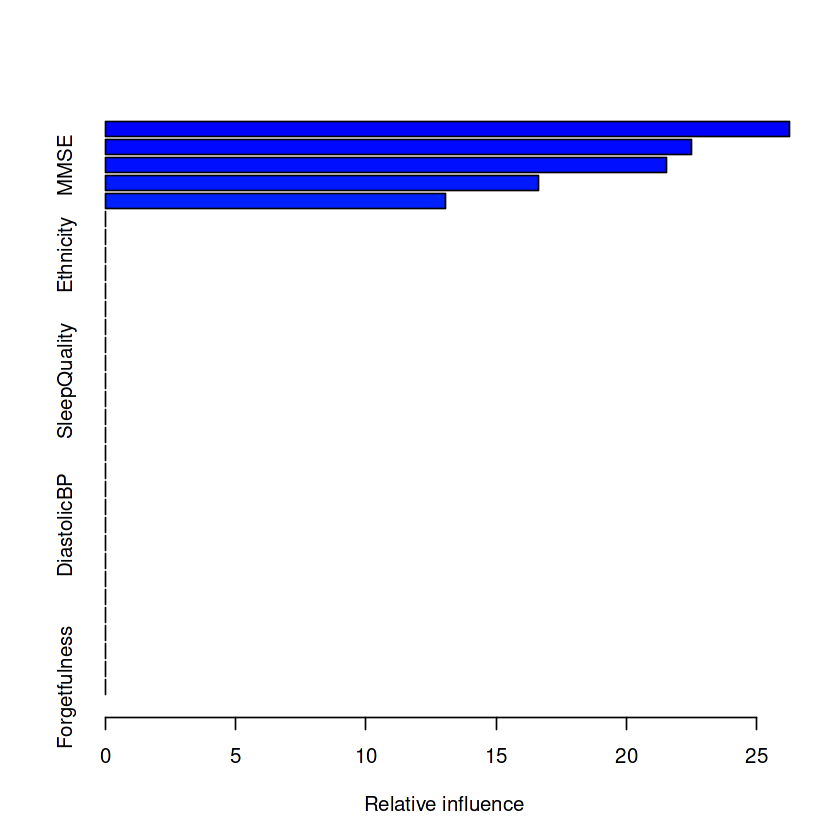

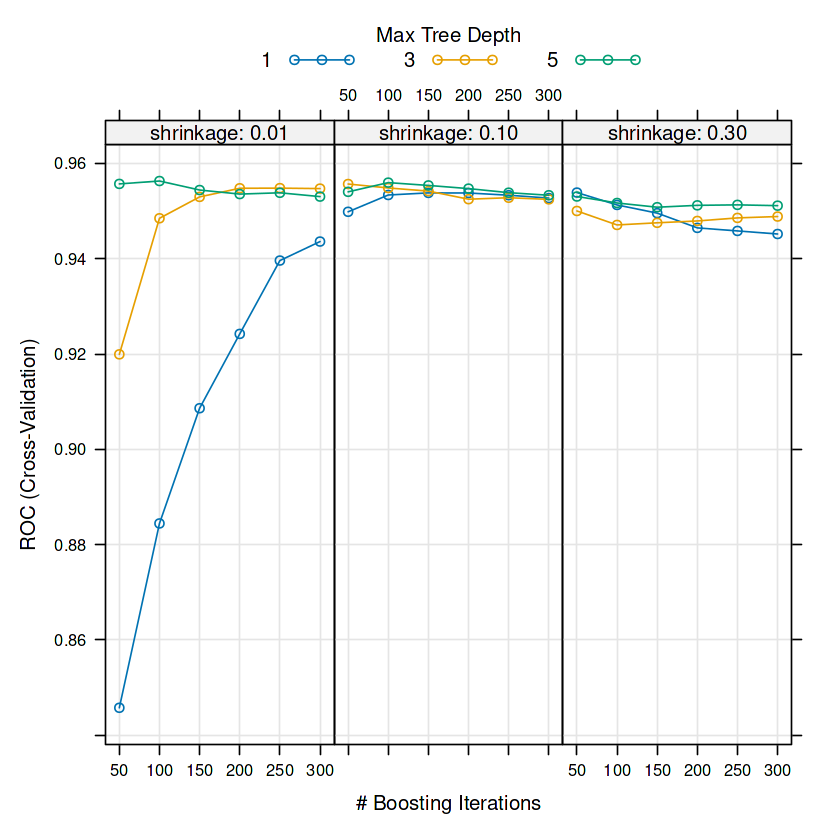

In [18]:
summary(model.gbm$finalModel)
plot(model.gbm)

In [19]:
#Obtain ROC > 95
#Compare to KNN and logistic (repeat KNN, logistic here)

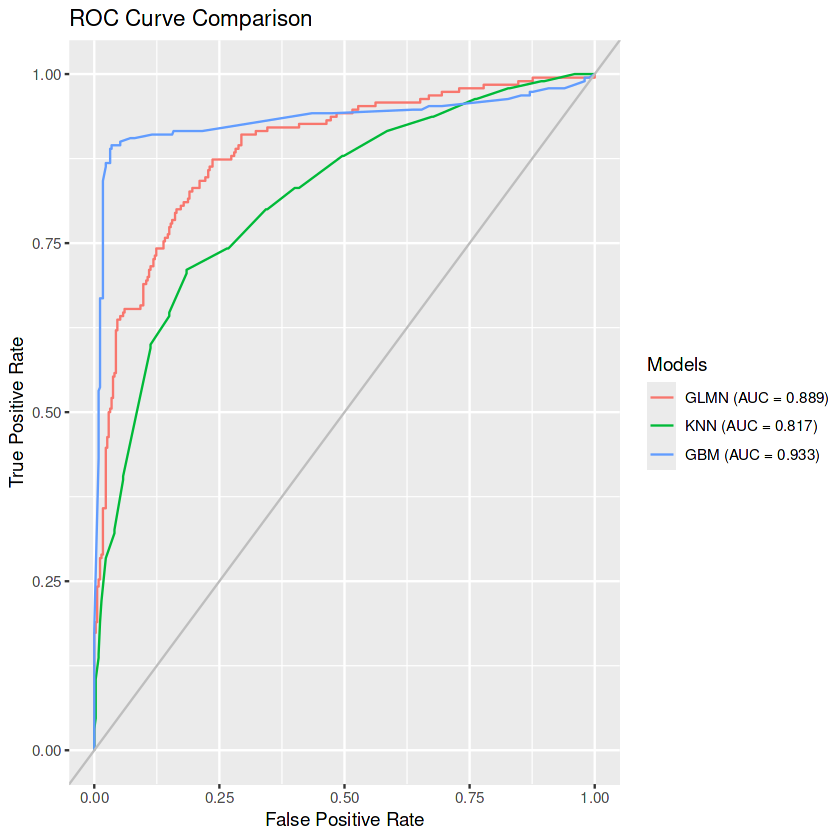

In [20]:
# Generate predictions for Gradient Boosting model
gbm.pred <- predict(model.gbm, newdata = data[-rowTrain,], type = "prob")[,2]

# Calculate ROC for Gradient Boosting
roc.gbm <- suppressMessages(roc(data$Diagnosis[-rowTrain], gbm.pred, 
                                 levels = c("No", "Yes"), direction = "auto"))

# Add Gradient Boosting AUC to the existing list
auc <- c(roc.glmn$auc[1], roc.knn$auc[1], roc.gbm$auc[1])

# Update model names
modelNames <- c("GLMN", "KNN", "GBM")

# Plot ROC Curves
ggroc(list(roc.glmn, roc.knn, roc.gbm), legacy.axes = TRUE) +
  scale_color_discrete(labels = paste0(modelNames, " (AUC = ", round(auc, 3), ")"),
                       name = "Models") +
  geom_abline(intercept = 0, slope = 1, color = "grey") +
  labs(title = "ROC Curve Comparison", x = "False Positive Rate", y = "True Positive Rate")


* Obtain AUC = 0.933 = 93.3% (GBM) to be the best AUC.

* Because Gradient Boosting update the residuals in every iteration. This allow us to put weight on missplaced observation to improve prediction gradually.

* The higher AUC for GBM suggests it balances the trade-off between true positives (sensitivity) and false positives (1-specificity) across various thresholds better than the other models.
